In [1]:
import igraph
import numpy as np
from Heuristics.implementation import Multi_Start_LS, GRASP
from Heuristics.utils.plot import plot_record_f, format_time

In [2]:
# define parameters
n_iter = 400
alpha = [0.05, 0.1] 
max_time = np.inf
seed = 0

In [3]:
# define instance
id_state = "07"
num_regions = 10

In [4]:
# read the graph
path_graphs = "./Mexican States - Data/Instances/Graph Instances/"
with open(path_graphs + f"{id_state}.pkl", "rb") as f:
    graph = igraph.Graph.Read_Pickle(f)
# display information
print(f"State with ID: {id_state}")
print(f"Instance with {graph.vcount()} nodes")
print(f"Regionalization in {num_regions} regions")

State with ID: 07
Instance with 123 nodes
Regionalization in 10 regions


## Single execution

In [5]:
# Single Local Search
results = Multi_Start_LS(graph, num_regions, 1, max_time = max_time, seed = seed)

Multi Start Local Search

Solution found : 457.023678
Executed in 0 seconds
Total execution time: 0.1610240936279297
P0 time: 0.00099945068359375
LS time: 0.10497117042541504


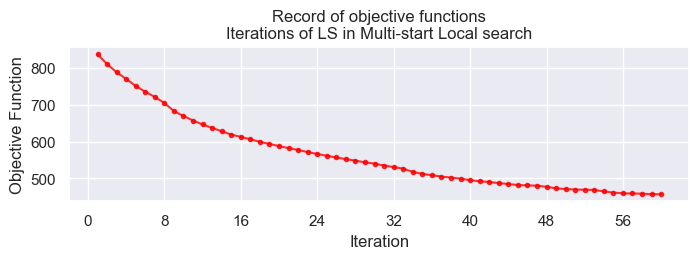

In [6]:
# get results
P = results["P"]
f = results["f_P"]
record_f = results["record_f"]
total_time = results["Total Time"]
time_P0 = results["Time: P0"]
time_ls = results["Time: LS"]
# display results
print("Multi Start Local Search\n")
print(f"Solution found : {round(f, 6)}")
print(f"Executed in {format_time(total_time)}")
print(f"Total execution time: {total_time}")
print(f"P0 time: {time_P0}")
print(f"LS time: {time_ls}")
# plot
plot_record_f(record_f, name = "Multi-start Local search", figsize = (8, 2))

In [7]:
# Multi Start Local Search
results = Multi_Start_LS(graph, num_regions, n_iter, max_time = max_time, seed = seed)

Multi Start Local Search

Solution found : 424.184871
Executed in 1 minutes 18 seconds
Total execution time: 77.79313230514526
P0 time: 1.1679472923278809
LS time: 76.56672692298889


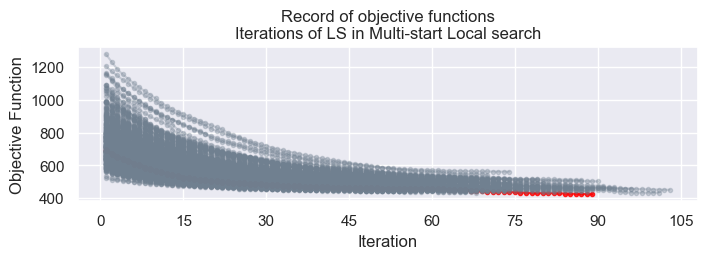

In [8]:
# get results
P = results["P"]
f = results["f_P"]
record_f = results["record_f"]
total_time = results["Total Time"]
time_P0 = results["Time: P0"]
time_ls = results["Time: LS"]
# display results
print("Multi Start Local Search\n")
print(f"Solution found : {round(f, 6)}")
print(f"Executed in {format_time(total_time)}")
print(f"Total execution time: {total_time}")
print(f"P0 time: {time_P0}")
print(f"LS time: {time_ls}")
# plot
plot_record_f(record_f, name = "Multi-start Local search", figsize = (8, 2))

In [9]:
# GRASP
results = GRASP(graph, num_regions, n_iter, alpha, max_time = max_time, seed = seed)

GRASP

Solution found : 427.572905
Executed in 58 seconds
Total execution time: 58.156410694122314
P0 time: 3.5833566188812256
LS time: 54.48239541053772


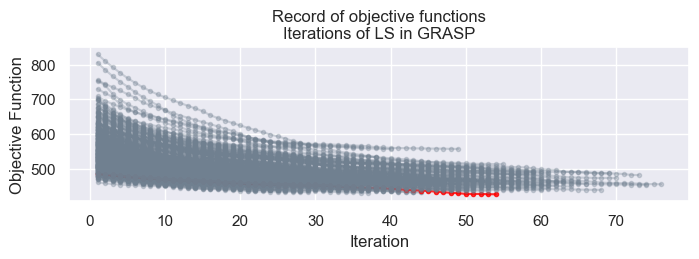

In [10]:
# get results
P = results["P"]
f = results["f_P"]
record_f = results["record_f"]
total_time = results["Total Time"]
time_P0 = results["Time: P0"]
time_ls = results["Time: LS"]
# display results
print("GRASP\n")
print(f"Solution found : {round(f, 6)}")
print(f"Executed in {format_time(total_time)}")
print(f"Total execution time: {total_time}")
print(f"P0 time: {time_P0}")
print(f"LS time: {time_ls}")
# plot
plot_record_f(record_f, name = "GRASP", figsize = (8, 2))

## Evaluate over multiple executions

In [11]:
# Single Local Search
results_f = []
for idx, seed in enumerate([0, 1, 2, 3, 4, 5, 6]):
    results = Multi_Start_LS(graph, num_regions, 1, max_time = max_time, seed = seed)
    results_f.append(results["f_P"])
results_f = np.array(results_f)

In [12]:
# see results
print(f"Min f: {np.round(results_f.min(), 2)}")
print(f"Mean f: {np.round(results_f.mean(), 2)}")
gap_w_b = 100*(results_f.max() - results_f.min())/results_f.min()
print(f"Gap from worst to best: {np.round(gap_w_b, 2)}")

Min f: 454.65
Mean f: 464.1
Gap from worst to best: 5.13


In [13]:
# Multi Start Local Search
results_f = []
for idx, seed in enumerate([0, 1, 2, 3, 4, 5, 6]):
    results = Multi_Start_LS(graph, num_regions, n_iter, max_time = max_time, seed = seed)
    results_f.append(results["f_P"])
results_f = np.array(results_f)

In [14]:
# see results
print(f"Min f: {np.round(results_f.min(), 2)}")
print(f"Mean f: {np.round(results_f.mean(), 2)}")
gap_w_b = 100*(results_f.max() - results_f.min())/results_f.min()
print(f"Gap from worst to best: {np.round(gap_w_b, 2)}")

Min f: 424.18
Mean f: 431.25
Gap from worst to best: 3.19


In [15]:
# GRASP
results_f = []
for idx, seed in enumerate([0, 1, 2, 3, 4, 5, 6]):
    results = GRASP(graph, num_regions, n_iter, alpha, max_time = max_time, seed = seed)
    results_f.append(results["f_P"])
results_f = np.array(results_f)

In [16]:
# see results
print(f"Min f: {np.round(results_f.min(), 2)}")
print(f"Mean f: {np.round(results_f.mean(), 2)}")
gap_w_b = 100*(results_f.max() - results_f.min())/results_f.min()
print(f"Gap from worst to best: {np.round(gap_w_b, 2)}")

Min f: 427.57
Mean f: 428.86
Gap from worst to best: 0.5
